In [1]:
from bs_fdbck.constants import get_input_datapath


In [2]:
import pandas as pd

## Get var info from file: 

In [3]:
from bs_fdbck.constants import path_data_info
fn_data_info_ec_earth = path_data_info / 'ec_earth_info'/'ec_earth_var_overview.csv'

df_varinfo = pd.read_csv(fn_data_info_ec_earth, index_col=0)

In [4]:
df_varinfo

,varname,orig_varn,long_name,units,Note
var_code,,,,,
var68,toa_net_srad_clearclean,NaN,"Top net solar radiation, clear sky, clean sky",J m-2,NaN
var69,toa_net_srad_clean,NaN,"Top net solar radiation, clean sky",J m-2,NaN
var70,surf_net_srad_clearclean,NaN,"Surface net solar radiation, clear sky, clean sky",J m-2,NaN
var71,surf_net_srad_clean,NaN,"Surface net solar radiation, clean sky",J m-2,NaN
var72,toa_net_lrad_clearclean,NaN,"Top net thermal radiation, clear sky, clean sky",J m-2,NaN
var73,toa_net_lrad_clean,NaN,"Top net thermal radiation, clean sky",J m-2,NaN
var74,surf_net_lrad_clearclean,NaN,"Surface net thermal radiation, clear sky, clea...",J m-2,NaN
var75,surf_net_lrad_clean,NaN,"Surface net thermal radiation, clean sky",J m-2,NaN
var176,surf_net_srad,ssr,Surface net solar radiation,J m-2,NaN


## Read EC-Earth data

In [5]:
pathEC = get_input_datapath('EC-Earth')

In [6]:
pathEC

PosixPath('/proj/aerosol_esm_lund/users/x_casve/ISMO/output/ECE3_output_Sara')

In [7]:
import xarray as xr

In [8]:
fl_TM5 = list(pathEC.glob('*TM5*.nc'))
fl_IFS_SH = list(pathEC.glob('IFS_SH*.nc'))
fl_IFS_TIFS = list(pathEC.glob('T_IFS*.nc'))
fl_IFS_GG = list(pathEC.glob('IFS_GG*.nc'))
fl_TM5.sort()
fl_IFS_SH.sort()
fl_IFS_GG.sort()


In [9]:
fl_IFS_GG[0]

PosixPath('/proj/aerosol_esm_lund/users/x_casve/ISMO/output/ECE3_output_Sara/IFS_GG+201201.nc')

In [10]:
fl_IFS_TIFS[0:2]

[PosixPath('/proj/aerosol_esm_lund/users/x_casve/ISMO/output/ECE3_output_Sara/T_IFS_SH+201308.nc'),
 PosixPath('/proj/aerosol_esm_lund/users/x_casve/ISMO/output/ECE3_output_Sara/T_IFS_SH+201606.nc')]

In [11]:
ds_t = xr.open_mfdataset(fl_IFS_TIFS[0:2])


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
(click 8.0.1 (/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages), Requirement.parse('click<8,>=4.0'), {'rasterio'})
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [12]:
ds_tm5 = xr.open_mfdataset(fl_TM5[0:2])


In [13]:
ds_tm5

<xarray.Dataset>
Dimensions:   (time: 1440, lon: 120, lat: 90, lev: 34)
Coordinates:
  * time      (time) datetime64[ns] 2012-01-01T00:30:00 ... 2012-02-29T23:30:00
  * lon       (lon) float64 -178.5 -175.5 -172.5 -169.5 ... 172.5 175.5 178.5
  * lat       (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lev       (lev) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 30.0 31.0 32.0 33.0 34.0
Data variables: (12/57)
    CCN0.20   (time, lev, lat, lon) float32 dask.array<chunksize=(744, 34, 90, 120), meta=np.ndarray>
    CCN1.00   (time, lev, lat, lon) float32 dask.array<chunksize=(744, 34, 90, 120), meta=np.ndarray>
    M_SO4NUS  (time, lev, lat, lon) float32 dask.array<chunksize=(744, 34, 90, 120), meta=np.ndarray>
    M_SOANUS  (time, lev, lat, lon) float32 dask.array<chunksize=(744, 34, 90, 120), meta=np.ndarray>
    M_BCAIS   (time, lev, lat, lon) float32 dask.array<chunksize=(744, 34, 90, 120), meta=np.ndarray>
    M_POMAIS  (time, lev, lat, lon) float32 dask.array<chunksize=(744, 34, 90, 120), meta=np.ndarray>
    ...        ...
    od440aer  (time, lat, lon) float32 dask.array<chunksize=(744, 90, 120), meta=np.ndarray>
    od870aer  (time, lat, lon) float32 dask.array<chunksize=(744, 90, 120), meta=np.ndarray>
    od350aer  (time, lat, lon) float32 dask.array<chunksize=(744, 90, 120), meta=np.ndarray>
    loadsoa   (time, lat, lon) float32 dask.array<chunksize=(744, 90, 120), meta=np.ndarray>
    emiterp   (time, lat, lon) float32 dask.array<chunksize=(744, 90, 120), meta=np.ndarray>
    emiisop   (time, lat, lon) float32 dask.array<chunksize=(744, 90, 120), meta=np.ndarray>
Attributes: (12/13)
    CDI:          Climate Data Interface version 1.9.2 (http://mpimet.mpg.de/...
    history:      Tue Nov 15 15:36:38 2022: cdo mergetime general_TM5_ISMO_20...
    source:       TM5-mp
    institution:  Royal Netherlands Meteorological Institute
    Conventions:  CF-1.6
    title:        Model output for General
    ...           ...
    project_id:   General Phase 3
    conventions:  CF-1.0 - HTAP
    date:         2012-01-01 00:30
    time_units:   days since 2001-01-01 00:00
    references:   http://tm5.sourceforge.net/
    CDO:          Climate Data Operators version 1.9.2 (http://mpimet.mpg.de/...

In [107]:
def convert_lon_to_180(lon):
    return (lon + 180) % 360 - 180

def convert_lon_to_360(lon):
    return lon % 360

In [104]:
import numpy as np

In [105]:
x = np.linspace(0,360)

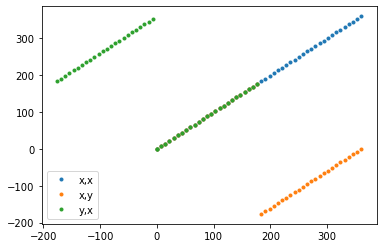

In [113]:
y = lon2_180(x)
plt.plot(x,x, linewidth=0, marker='.', label='x,x')

plt.plot(x,y, linewidth=0, marker='.', label='x,y')
plt.plot(y,convert_lon_to_360(y), linewidth=0, marker='.', label='y,x')
plt.legend()

In [14]:
import datetime

In [15]:
def fix_timestamp_ec_earth(ds):
    

    ds.assign_coords(time=ti_new.rename({'time':'time_orig'})).swap_dims({'time_orig':'time'})

    ds = ds_tm5
    ti = ds['time']
    ti_new = ti - pd.Timedelta(30,'minutes')
    ds = ds.rename({'time':'time_orig'})
    ds['time'] = ds.assign_coords(time=("time_orig", ti_new))#, dims='time_orig')
    ds

In [16]:

def fix_timestamp_ec_earth(ds):
    if float(ds['time.minute'].isel(time=0))==0:
        return ds
    ti = ds['time']
    timedelta = pd.Timedelta(30,'minutes')
    ti_new = ti - timedelta
    ds = ds.rename({'time':'time_orig'})
    #ds['time'] = ti_new
    ds = ds.assign_coords(time=ti_new.rename({'time':'time_orig'}))
    ds = ds.swap_dims({'time_orig':'time'})
    return ds

In [17]:
ti = ds_tm5['time.minute'].isel(time=0)#.minuts

In [18]:
float(ti)

30.0

In [19]:
ti2 = ti.values#.minutes

In [20]:
fix_timestamp_ec_earth(ds_t)

<xarray.Dataset>
Dimensions:   (time: 487, lon: 512, lat: 256, bnds: 2, lev: 91, nhyi: 92, nhym: 91)
Coordinates:
  * time      (time) datetime64[ns] 2013-08-01T03:00:00 ... 2016-07-01
  * lon       (lon) float64 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
  * lat       (lat) float64 89.46 88.77 88.07 87.37 ... -88.07 -88.77 -89.46
  * lev       (lev) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 87.0 88.0 89.0 90.0 91.0
Dimensions without coordinates: bnds, nhyi, nhym
Data variables:
    lat_bnds  (time, lat, bnds) float64 dask.array<chunksize=(247, 256, 2), meta=np.ndarray>
    hyai      (time, nhyi) float64 dask.array<chunksize=(247, 92), meta=np.ndarray>
    hybi      (time, nhyi) float64 dask.array<chunksize=(247, 92), meta=np.ndarray>
    hyam      (time, nhym) float64 dask.array<chunksize=(247, 91), meta=np.ndarray>
    hybm      (time, nhym) float64 dask.array<chunksize=(247, 91), meta=np.ndarray>
    var130    (time, lev, lat, lon) float32 dask.array<chunksize=(247, 91, 256, 512), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Wed Dec 14 00:15:53 2022: cdo sp2gpl Tsp.nc T_IFS_SH+201308...
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

In [21]:
(ds_t['var130'].mean(['time','lon'])-273.15).plot()

KeyboardInterrupt: 

In [22]:
ds_2 = xr.open_mfdataset( fl_IFS_GG[0:2])

In [23]:
ds_2

<xarray.Dataset>
Dimensions:  (time: 480, lon: 512, lat: 256, plev: 11, lev: 91, nhyi: 92, nhym: 91)
Coordinates:
  * time     (time) datetime64[ns] 2012-01-01T03:00:00 ... 2012-03-01
  * lon      (lon) float32 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
  * lat      (lat) float32 89.46 88.77 88.07 87.37 ... -88.07 -88.77 -89.46
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+04 5e+03 1e+03
  * lev      (lev) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 87.0 88.0 89.0 90.0 91.0
Dimensions without coordinates: nhyi, nhym
Data variables: (12/31)
    hyai     (time, nhyi) float64 dask.array<chunksize=(248, 92), meta=np.ndarray>
    hybi     (time, nhyi) float64 dask.array<chunksize=(248, 92), meta=np.ndarray>
    hyam     (time, nhym) float64 dask.array<chunksize=(248, 91), meta=np.ndarray>
    hybm     (time, nhym) float64 dask.array<chunksize=(248, 91), meta=np.ndarray>
    var176   (time, lat, lon) float32 dask.array<chunksize=(248, 256, 512), meta=np.ndarray>
    var177   (time, lat, lon) float32 dask.array<chunksize=(248, 256, 512), meta=np.ndarray>
    ...       ...
    var22    (time, lev, lat, lon) float32 dask.array<chunksize=(248, 91, 256, 512), meta=np.ndarray>
    var78    (time, lat, lon) float32 dask.array<chunksize=(248, 256, 512), meta=np.ndarray>
    var79    (time, lat, lon) float32 dask.array<chunksize=(248, 256, 512), meta=np.ndarray>
    var136   (time, lat, lon) float32 dask.array<chunksize=(248, 256, 512), meta=np.ndarray>
    var137   (time, lat, lon) float32 dask.array<chunksize=(248, 256, 512), meta=np.ndarray>
    var164   (time, lat, lon) float32 dask.array<chunksize=(248, 256, 512), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Tue Nov 15 13:06:41 2022: cdo -f nc copy reg_gaus_var IFS_G...
    institution:  European Centre for Medium-Range Weather Forecasts
    CDO:          Climate Data Operators version 1.9.2 (http://mpimet.mpg.de/...

In [ ]:
(ds_t['var130'].isel(lev=-1, time=0)-273.15).plot()

In [24]:
ds_sh = xr.open_mfdataset(fl_IFS_SH[0:2], )

In [25]:
ds_gg = xr.open_mfdataset(fl_IFS_GG[0:2], )

In [26]:
ds_gg['var130']

<xarray.DataArray 'var130' (time: 480, plev: 11, lat: 256, lon: 512)>
dask.array<concatenate, shape=(480, 11, 256, 512), dtype=float32, chunksize=(248, 11, 256, 512), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2012-01-01T03:00:00 ... 2012-03-01
  * lon      (lon) float32 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
  * lat      (lat) float32 89.46 88.77 88.07 87.37 ... -88.07 -88.77 -89.46
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+04 5e+03 1e+03
Attributes:
    table:    126

In [ ]:
ds_gg['var130'].sel(plev=1e5).mean('time').plot(cmap='viridis')

In [27]:
ds_sh

<xarray.Dataset>
Dimensions:   (time: 480, plev: 1, lev: 91, nhyi: 92, nhym: 91, lev_2: 1, nsp: 32896, nc2: 2)
Coordinates:
  * time      (time) datetime64[ns] 2012-01-01T03:00:00 ... 2012-03-01
  * plev      (plev) float64 1e+05
  * lev       (lev) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 87.0 88.0 89.0 90.0 91.0
  * lev_2     (lev_2) float64 1.0
Dimensions without coordinates: nhyi, nhym, nsp, nc2
Data variables:
    hyai      (time, nhyi) float64 dask.array<chunksize=(248, 92), meta=np.ndarray>
    hybi      (time, nhyi) float64 dask.array<chunksize=(248, 92), meta=np.ndarray>
    hyam      (time, nhym) float64 dask.array<chunksize=(248, 91), meta=np.ndarray>
    hybm      (time, nhym) float64 dask.array<chunksize=(248, 91), meta=np.ndarray>
    var152    (time, plev, nsp, nc2) float32 dask.array<chunksize=(248, 1, 32896, 2), meta=np.ndarray>
    var131    (time, lev, nsp, nc2) float32 dask.array<chunksize=(248, 91, 32896, 2), meta=np.ndarray>
    var132    (time, lev, nsp, nc2) float32 dask.array<chunksize=(248, 91, 32896, 2), meta=np.ndarray>
    var130    (time, lev, nsp, nc2) float32 dask.array<chunksize=(248, 91, 32896, 2), meta=np.ndarray>
    var54     (time, lev, nsp, nc2) float32 dask.array<chunksize=(248, 91, 32896, 2), meta=np.ndarray>
    var152_2  (time, lev_2, nsp, nc2) float32 dask.array<chunksize=(248, 1, 32896, 2), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Tue Nov 15 13:11:03 2022: cdo -f nc copy ICMSHISMO+201201 I...
    institution:  European Centre for Medium-Range Weather Forecasts
    CDO:          Climate Data Operators version 1.9.2 (http://mpimet.mpg.de/...

In [28]:
def rename_ifs_vars(ds):
    for v in ds.data_vars:
        if v in df_varinfo.index:
            ds[v].attrs['long_name'] = df_varinfo.loc[v,'long_name']
            ds = ds.rename({v:df_varinfo.loc[v,'varname']})
    return ds
ds_gg = rename_ifs_vars(ds_gg)

In [29]:
ds_sh = rename_ifs_vars(ds_sh)

In [30]:
ds_gg

<xarray.Dataset>
Dimensions:                   (time: 480, lon: 512, lat: 256, plev: 11, lev: 91, nhyi: 92, nhym: 91)
Coordinates:
  * time                      (time) datetime64[ns] 2012-01-01T03:00:00 ... 2...
  * lon                       (lon) float32 0.0 0.7031 1.406 ... 358.6 359.3
  * lat                       (lat) float32 89.46 88.77 88.07 ... -88.77 -89.46
  * plev                      (plev) float64 1e+05 9.25e+04 ... 5e+03 1e+03
  * lev                       (lev) float64 1.0 2.0 3.0 4.0 ... 89.0 90.0 91.0
Dimensions without coordinates: nhyi, nhym
Data variables: (12/31)
    hyai                      (time, nhyi) float64 dask.array<chunksize=(248, 92), meta=np.ndarray>
    hybi                      (time, nhyi) float64 dask.array<chunksize=(248, 92), meta=np.ndarray>
    hyam                      (time, nhym) float64 dask.array<chunksize=(248, 91), meta=np.ndarray>
    hybm                      (time, nhym) float64 dask.array<chunksize=(248, 91), meta=np.ndarray>
    surf_net_srad             (time, lat, lon) float32 dask.array<chunksize=(248, 256, 512), meta=np.ndarray>
    surf_net_lrad             (time, lat, lon) float32 dask.array<chunksize=(248, 256, 512), meta=np.ndarray>
    ...                        ...
    var22                     (time, lev, lat, lon) float32 dask.array<chunksize=(248, 91, 256, 512), meta=np.ndarray>
    tclw                      (time, lat, lon) float32 dask.array<chunksize=(248, 256, 512), meta=np.ndarray>
    tciw                      (time, lat, lon) float32 dask.array<chunksize=(248, 256, 512), meta=np.ndarray>
    tcw                       (time, lat, lon) float32 dask.array<chunksize=(248, 256, 512), meta=np.ndarray>
    tcwv                      (time, lat, lon) float32 dask.array<chunksize=(248, 256, 512), meta=np.ndarray>
    ttc                       (time, lat, lon) float32 dask.array<chunksize=(248, 256, 512), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Tue Nov 15 13:06:41 2022: cdo -f nc copy reg_gaus_var IFS_G...
    institution:  European Centre for Medium-Range Weather Forecasts
    CDO:          Climate Data Operators version 1.9.2 (http://mpimet.mpg.de/...

In [31]:
import numpy as np

In [43]:
_ds = ds_gg.sel(lat=61, lon=24, method='nearest').isel(plev=-1, lev=-1)

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(


In [44]:
from dask.diagnostics import ProgressBar

In [45]:
_ds

<xarray.Dataset>
Dimensions:                   (time: 480, nhyi: 92, nhym: 91)
Coordinates:
  * time                      (time) datetime64[ns] 2012-01-01T03:00:00 ... 2...
    lon                       float32 23.91
    lat                       float32 60.7
    plev                      float64 1e+03
    lev                       float64 91.0
Dimensions without coordinates: nhyi, nhym
Data variables: (12/31)
    hyai                      (time, nhyi) float64 dask.array<chunksize=(248, 92), meta=np.ndarray>
    hybi                      (time, nhyi) float64 dask.array<chunksize=(248, 92), meta=np.ndarray>
    hyam                      (time, nhym) float64 dask.array<chunksize=(248, 91), meta=np.ndarray>
    hybm                      (time, nhym) float64 dask.array<chunksize=(248, 91), meta=np.ndarray>
    surf_net_srad             (time) float32 dask.array<chunksize=(248,), meta=np.ndarray>
    surf_net_lrad             (time) float32 dask.array<chunksize=(248,), meta=np.ndarray>
    ...                        ...
    var22                     (time) float32 dask.array<chunksize=(248,), meta=np.ndarray>
    tclw                      (time) float32 dask.array<chunksize=(248,), meta=np.ndarray>
    tciw                      (time) float32 dask.array<chunksize=(248,), meta=np.ndarray>
    tcw                       (time) float32 dask.array<chunksize=(248,), meta=np.ndarray>
    tcwv                      (time) float32 dask.array<chunksize=(248,), meta=np.ndarray>
    ttc                       (time) float32 dask.array<chunksize=(248,), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Tue Nov 15 13:06:41 2022: cdo -f nc copy reg_gaus_var IFS_G...
    institution:  European Centre for Medium-Range Weather Forecasts
    CDO:          Climate Data Operators version 1.9.2 (http://mpimet.mpg.de/...

In [49]:
with ProgressBar():
    _ds.compute()
    _ds.load()    

[########################################] | 100% Completed |  8.4s
[########################################] | 100% Completed |  1.3s


In [90]:
_ds['transmittance'] = (_ds['surf_net_srad']/_ds['surf_net_srad_clear']).where(_ds['surf_net_srad_clear']>0)

In [93]:
_ds['tau_maybe'] =-np.log(_ds['transmittance'])


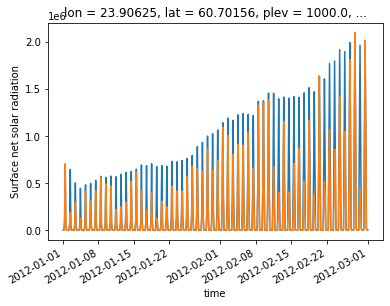

In [52]:
_ds['surf_net_srad_clear'].plot()
_ds['surf_net_srad'].plot()

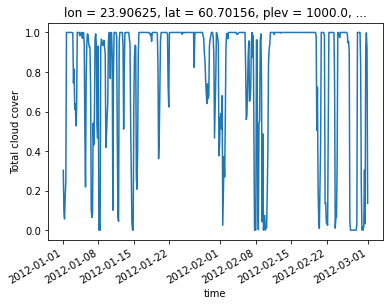

In [74]:
_ds['ttc'].plot()

In [80]:
import matplotlib.pyplot as plt

(array([10., 16.,  9., 20., 15., 19., 22., 27., 18., 35.]),
 array([0.18977273, 0.2709666 , 0.35216048, 0.43335435, 0.51454824,
        0.5957421 , 0.676936  , 0.75812984, 0.83932376, 0.9205176 ,
        1.0017115 ], dtype=float32),
 <BarContainer object of 10 artists>)

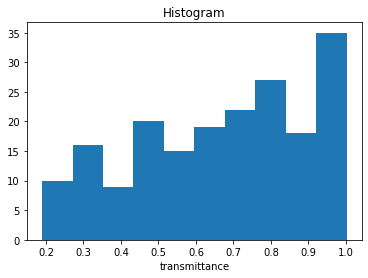

In [98]:
_ds['transmittance'].plot.hist()

(array([50., 45., 22., 19., 20.,  6., 12.,  8.,  5.,  4.]),
 array([-0.00171002,  0.1646538 ,  0.3310176 ,  0.49738145,  0.6637453 ,
         0.83010906,  0.9964729 ,  1.1628367 ,  1.3292005 ,  1.4955643 ,
         1.6619282 ], dtype=float32),
 <BarContainer object of 10 artists>)

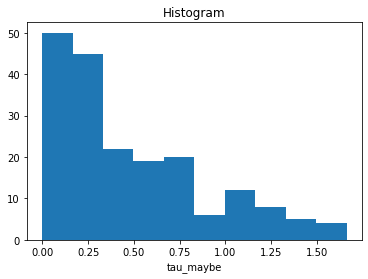

In [95]:
_ds['tau_maybe'].plot.hist()

In [ ]:
tau = 30


(0.0, 3.0)

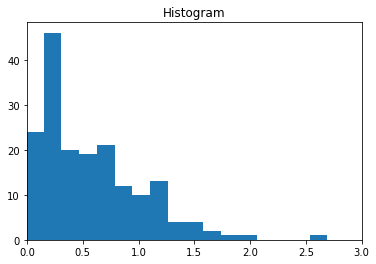

In [88]:
((_ds['tau_maybe']/_ds['ttc']).where(_ds['ttc']>0)).plot.hist(bins=100)
plt.xlim([0,3])


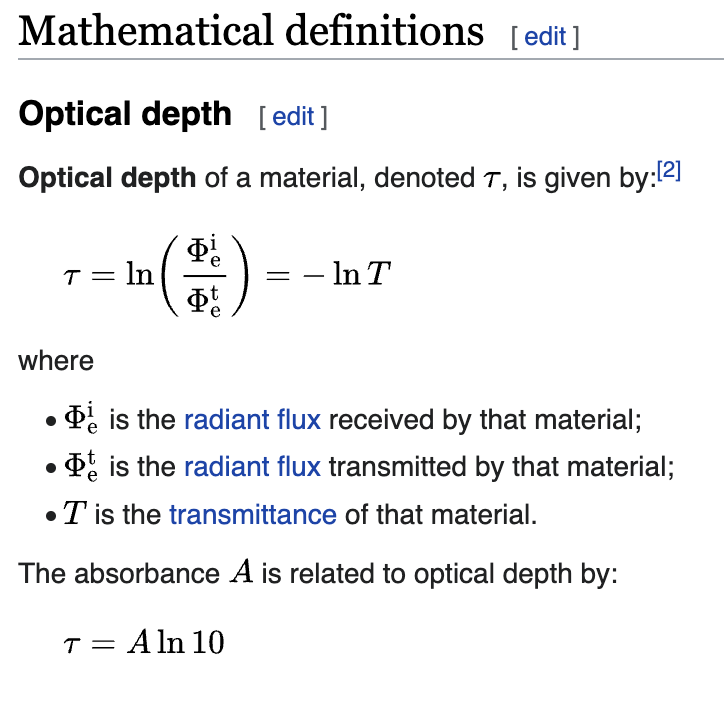


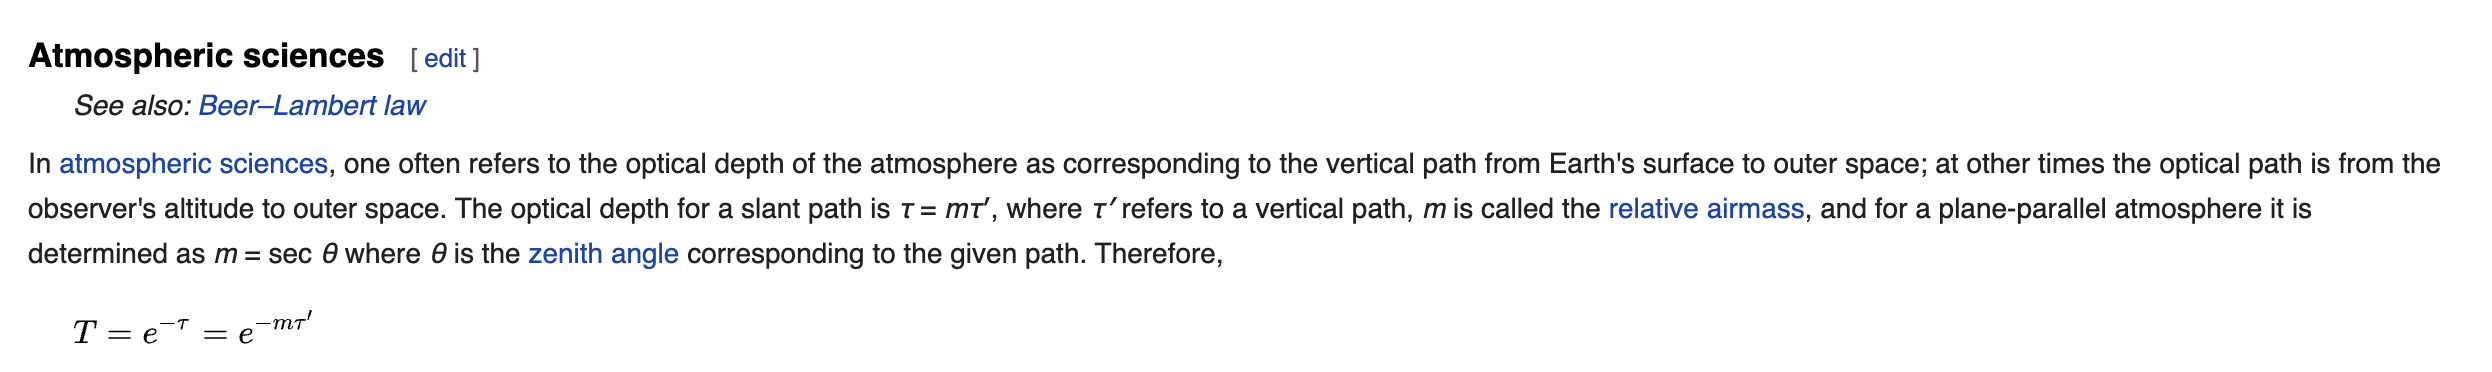

Meaning:
\begin{align}
T =& e^{-m \tau} \\
-ln(T) =& m \tau  \\
-ln(T) =& m \tau  \\
\tau =& -ln(T)/m  \\
\tau =& -ln(T)/sec(\theta)  \\
\tau =& -ln(T) cos(\theta)  \\
\end{align}


Only makes it smaller...

In [101]:
tau= 30
trans = np.exp(-tau)
trans

9.357622968840175e-14

In [100]:
trans


9.357622968840175e-14

In [82]:
ds_gg['t']#.isel(time=0, plev=2).plot(robust=True,)

<xarray.DataArray 't' (time: 480, plev: 11, lat: 256, lon: 512)>
dask.array<concatenate, shape=(480, 11, 256, 512), dtype=float32, chunksize=(248, 11, 256, 512), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2012-01-01T03:00:00 ... 2012-03-01
  * lon      (lon) float32 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
  * lat      (lat) float32 89.46 88.77 88.07 87.37 ... -88.07 -88.77 -89.46
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+04 5e+03 1e+03
Attributes:
    table:      126
    long_name:  Temperature

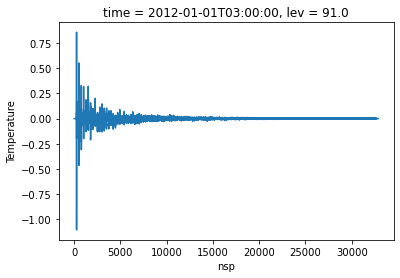

In [77]:
ds_sh['t'].isel(time=0, lev=-1, nc2=1).plot()#robust=True)

In [ ]:
dic_ifs_vars = {
   'var130':'Temperature',
    'var131':'U',
    'var132':'V',
    'var167':'temp2m',
    'var152':'var152',
    'var54':
    
    

In [55]:
OA_components = [
    'M_SOANUS',
    'M_POMAIS',
    'M_SOAAIS',
    'M_POMACS',
    'M_SOAACS',
    'M_POMCOS',
    'M_SOACOS',
    'M_POMAII',
    'M_SOAAII',
]
SOA_components = [
    'M_SOANUS', 
    'M_SOAAIS', 
    'M_SOAACS', 
#    'M_SOACOS', 
    'M_SOAAII'
]
POM_components = [
    'M_POMAIS', 
    'M_POMACS', 
#    'M_POMCOS', 
    'M_POMAII'
]

OA_components

['M_SOANUS',
 'M_POMAIS',
 'M_SOAAIS',
 'M_POMACS',
 'M_SOAACS',
 'M_POMCOS',
 'M_SOACOS',
 'M_POMAII',
 'M_SOAAII']

In [53]:
ds_sub = ds.sel(time=slice('2012-01-01','2012-01-02')).isel(lev=0)

In [54]:
def compute_OAs(ds):
    ds['OA'] = 0
    ds['POM'] = 0
    
    # whats better, this:
    ds['SOA'] = 0
    for v in  SOA_components:
        ds['SOA'] = ds['SOA']  + ds[v]
    for v in  POM_components:
        ds['POM'] = ds['POM']  + ds[v]
    ds['OA'] = ds['SOA'] + ds['POM']
    ## or this:
    ds['SOA2'] = ds[SOA_components].to_array(dim='comps', name='SOA').sum('comps')
    
    
    ds['SOA'].attrs['units'] = ds[SOA_components[0]].attrs['units']
    ds['OA'].attrs['units'] = ds[SOA_components[0]].attrs['units']
    ds['POM'].attrs['units'] = ds[POM_components[0]].attrs['units']
    return ds
compute_OAs(ds_sub)

<xarray.Dataset>
Dimensions:   (time: 48, lon: 120, lat: 90)
Coordinates:
  * time      (time) datetime64[ns] 2012-01-01T00:30:00 ... 2012-01-02T23:30:00
  * lon       (lon) float64 -178.5 -175.5 -172.5 -169.5 ... 172.5 175.5 178.5
  * lat       (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
    lev       float64 1.0
Data variables: (12/61)
    CCN0.20   (time, lat, lon) float32 dask.array<chunksize=(48, 90, 120), meta=np.ndarray>
    CCN1.00   (time, lat, lon) float32 dask.array<chunksize=(48, 90, 120), meta=np.ndarray>
    M_SO4NUS  (time, lat, lon) float32 dask.array<chunksize=(48, 90, 120), meta=np.ndarray>
    M_SOANUS  (time, lat, lon) float32 dask.array<chunksize=(48, 90, 120), meta=np.ndarray>
    M_BCAIS   (time, lat, lon) float32 dask.array<chunksize=(48, 90, 120), meta=np.ndarray>
    M_POMAIS  (time, lat, lon) float32 dask.array<chunksize=(48, 90, 120), meta=np.ndarray>
    ...        ...
    emiterp   (time, lat, lon) float32 dask.array<chunksize=(48, 90, 120), meta=np.ndarray>
    emiisop   (time, lat, lon) float32 dask.array<chunksize=(48, 90, 120), meta=np.ndarray>
    OA        (time, lat, lon) float64 dask.array<chunksize=(48, 90, 120), meta=np.ndarray>
    POM       (time, lat, lon) float64 dask.array<chunksize=(48, 90, 120), meta=np.ndarray>
    SOA       (time, lat, lon) float64 dask.array<chunksize=(48, 90, 120), meta=np.ndarray>
    SOA2      (time, lat, lon) float32 dask.array<chunksize=(48, 90, 120), meta=np.ndarray>
Attributes: (12/13)
    CDI:          Climate Data Interface version 1.9.2 (http://mpimet.mpg.de/...
    history:      Tue Nov 15 15:36:38 2022: cdo mergetime general_TM5_ISMO_20...
    source:       TM5-mp
    institution:  Royal Netherlands Meteorological Institute
    Conventions:  CF-1.6
    title:        Model output for General
    ...           ...
    project_id:   General Phase 3
    conventions:  CF-1.0 - HTAP
    date:         2012-01-01 00:30
    time_units:   days since 2001-01-01 00:00
    references:   http://tm5.sourceforge.net/
    CDO:          Climate Data Operators version 1.9.2 (http://mpimet.mpg.de/...

In [59]:
from bs_fdbck.util.BSOA_datamanip.ec_earth import *

In [60]:
kg2ug = 1e9

def fix_units_ec_earth(ds):
    for v in num_vars:
        if v in ds:
            if ds[v].attrs['units'] == '1 m-3':
                print(f'Converting {v} from m-3 to cm-3')
                with xr.set_options(keep_attrs=True):
                    ds[v] = ds[v] * 1e-6
                ds[v].attrs['units'] = 'cm-3'
    for v in rad_vars:
        if v in ds:
            if ds[v].attrs['units'] == 'm':
                print(f'Converting {v} from m to nm')
                with xr.set_options(keep_attrs=True):
                    ds[v] = ds[v] * 1e9
                ds[v].attrs['units'] = 'nm'
    for v in diam_vars:
        if v in ds:
            if ds[v].attrs['units'] == 'm':
                print(f'Converting {v} from m to nm')
                with xr.set_options(keep_attrs=True):
                    ds[v] = ds[v] * 1e9
                ds[v].attrs['units'] = 'nm'

    ds = add_diameter_mode(ds)
    
    for v in OA_components + ['OA','POM','SOA']:
        if v in ds:
            if ds[v].attrs['units'] == 'kg m-3':
                print(f'Converting {v} from kg/m3 to um/m3')
                with xr.set_options(keep_attrs=True):
                    ds[v] = ds[v] * kg2ug
                ds[v].attrs['units'] = 'ug m-3'
        
    
    return ds
ds_sub = fix_units_ec_earth(ds_sub)

Converting N_NUS from m-3 to cm-3
Converting N_AIS from m-3 to cm-3
Converting N_ACS from m-3 to cm-3
Converting N_COS from m-3 to cm-3
Converting N_AII from m-3 to cm-3
Converting N_ACI from m-3 to cm-3
Converting N_COI from m-3 to cm-3
Converting RDRY_NUS from m to nm
Converting RDRY_AIS from m to nm
Converting RDRY_ACS from m to nm
Converting RDRY_COS from m to nm
Converting RWET_AII from m to nm
Converting RWET_ACI from m to nm
Converting RWET_COI from m to nm
Converting M_SOANUS from kg/m3 to um/m3
Converting M_POMAIS from kg/m3 to um/m3
Converting M_SOAAIS from kg/m3 to um/m3
Converting M_POMACS from kg/m3 to um/m3
Converting M_SOAACS from kg/m3 to um/m3
Converting M_POMCOS from kg/m3 to um/m3
Converting M_SOACOS from kg/m3 to um/m3
Converting M_POMAII from kg/m3 to um/m3
Converting M_SOAAII from kg/m3 to um/m3
Converting OA from kg/m3 to um/m3
Converting POM from kg/m3 to um/m3
Converting SOA from kg/m3 to um/m3


In [61]:
6+3

9

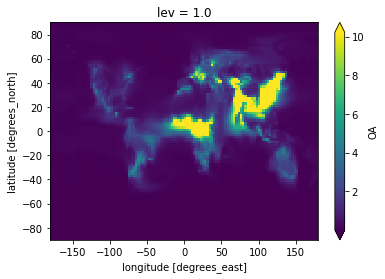

In [64]:
ds_sub['OA'].mean('time').plot(robust=True)